In [30]:
X = torch.tensor([
    [0., 0.],
    [0., 1.],
    [1., 0.],
    [1., 1.]
])

y = torch.tensor([0., 1, 1, 0]).reshape((4, 1))

In [22]:
from torch import nn

class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(in_features=2, out_features=2),
            nn.ReLU(),
            nn.Linear(in_features=2, out_features=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.layers(x)


yhat = m(X)

In [161]:
from torch.optim import Adam

def train_run(show: bool = False):
    m = Model()
    loss = nn.BCELoss()
    opt = Adam(lr=.1, params=m.parameters())
    
    for _ in range(200):
        opt.zero_grad()
        l = loss(m(X), y)
        if show and (_ % 20 == 0):
            print("loss:", l.item())
        l.backward()
        opt.step()

    return l.item()

In [163]:
losses = [train_run() for _ in range(100)]

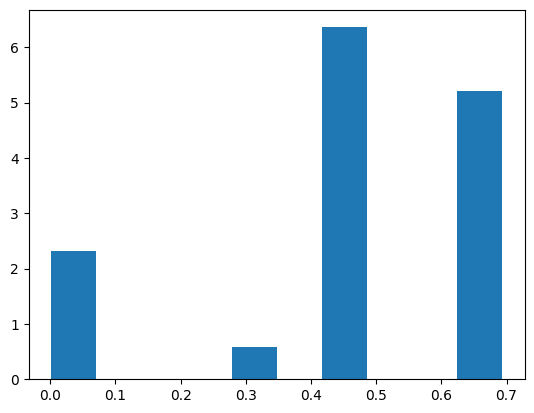

In [173]:
import matplotlib.pyplot as plt

plt.hist(losses, density=True)
plt.show()